In [1]:
import sys
import os
from glob import glob
sys.path.append("../NEAT")
from NEATModels import NEATDynamic, nets
from NEATModels.config  import dynamic_config
from NEATUtils import helpers
from NEATUtils.helpers import save_json, load_json
os.environ["CUDA_VISIBLE_DEVICES"]="0"
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"


Using TensorFlow backend.


In [2]:
npz_directory = '/home/sancere/Kepler/FinalONEATTraining/OffsetMicroscopeDivisionData/'
npz_name = 'offsetmicroneatbin2.npz'
npz_val_name = 'offsetmicroneatbin2val.npz'
model_dir = '/home/sancere/Kepler/FinalONEATTraining/Microneatmodel/'
#Model name based on wether it is residual or sequntial ONEAT network
model_name = 'offsetmicroseqnetbin2d56.h5'

In [3]:
division_categories_json = model_dir + 'MicroscopeCategories.json'
key_categories = load_json(division_categories_json)
division_cord_json = model_dir + 'MicroscopeCord.json'
key_cord = load_json(division_cord_json)

#For ORNET use residual = True and for OSNET use residual = False
residual = False
#NUmber of starting convolutional filters, is doubled down with increasing depth
startfilter = 48
#CNN network start layer, mid layers and lstm layer kernel size
start_kernel = 7
lstm_kernel = 3
mid_kernel = 3
#Network depth has to be 9n + 2, n= 3 or 4 is optimal for Notum dataset
depth = 56
#Size of the gradient descent length vector, start small and use callbacks to get smaller when reaching the minima
learning_rate = 1.0E-6
#For stochastic gradient decent, the batch size used for computing the gradients
batch_size = 8
# use softmax for single event per box, sigmoid for multi event per box
lstm_hidden_unit = 16
#Training epochs, longer the better with proper chosen learning rate
epochs = 250
nboxes = 1
#The inbuilt model stride which is equal to the nulber of times image was downsampled by the network
show = True

size_tminus = 3
size_tplus = 0
imagex = 64
imagey = 64

In [4]:
config = dynamic_config(npz_directory =npz_directory, npz_name = npz_name, npz_val_name = npz_val_name, 
                         
                         key_categories = key_categories, key_cord = key_cord, nboxes = nboxes, imagex = imagex,
                         imagey = imagey, size_tminus = size_tminus, size_tplus =size_tplus, epochs = epochs,
                         residual = residual, depth = depth, start_kernel = start_kernel, mid_kernel = mid_kernel,
                         lstm_kernel = lstm_kernel, lstm_hidden_unit = lstm_hidden_unit, show = show,
                         startfiler = startfilter, batch_size = batch_size, model_name = model_name)

config_json = config.to_json()

print(config)
save_json(config_json, model_dir + os.path.splitext(model_name)[0] + '_Parameter.json')

dynamic_config(batch_size=8, box_vector=5, categories=2, depth=56, epochs=250, imagex=64, imagey=64, key_categories={'Normal': 0, 'Division': 1}, key_cord={'x': 0, 'y': 1, 't': 2, 'h': 3, 'w': 4}, learning_rate=0.0001, lstm_hidden_unit=16, lstm_kernel=3, mid_kernel=3, model_name='offsetmicroseqnetbin2d56.h5', multievent=False, nboxes=1, npz_directory='/home/sancere/Kepler/FinalONEATTraining/OffsetMicroscopeDivisionData/', npz_name='offsetmicroneatbin2.npz', npz_val_name='offsetmicroneatbin2val.npz', residual=False, show=True, size_tminus=3, size_tplus=0, start_kernel=7, startfilter=48, stride=4, yolo_v0=True, yolo_v1=False, yolo_v2=False)


(27397, 4, 64, 64, 1) (27397, 7, 1)
number of  images:	 27397
image size (3D):		 (4, 64, 64)
axes:				 STXYC
channels in / out:		 1
(1442, 4, 64, 64, 1) (1442, 7, 1)
number of  images:	 1442
image size (3D):		 (4, 64, 64)
axes:				 STXYC
channels in / out:		 1
(27397, 7, 1)
5
(27397, 1, 1, 7) 1


/home/sancere/anaconda3/envs/tensorflowGPU/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass classes=[0], y=[0 0 0 ... 0 0 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
2021-07-02 11:31:46.447699: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-07-02 11:31:46.524171: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:17:00.0 name: Quadro RTX 6000 computeCapability: 7.5
coreClock: 1.77GHz coreCount: 72 deviceMemorySize: 23.64GiB deviceMemoryBandwidth: 625.94GiB/s
2021-07-02 11:31:46.524493: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-07-02 11:31:46.526775: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynam

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 4, None, None 0                                            
__________________________________________________________________________________________________
time_distributed_1 (TimeDistrib (None, 4, None, None 2400        input_1[0][0]                    
__________________________________________________________________________________________________
conv3d_1 (Conv3D)               (None, 4, None, None 16512       input_1[0][0]                    
__________________________________________________________________________________________________
time_distributed_2 (TimeDistrib (None, 4, None, None 192         time_distributed_1[0][0]         
____________________________________________________________________________________________

Train on 27397 samples, validate on 1442 samples
Epoch 1/250


2021-07-02 11:32:11.873476: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2021-07-02 11:32:14.517893: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10


27397/27397 [==============================] - 1360s 50ms/step - loss: 1.7964 - accuracy: 0.2159 - val_loss: 1.6705 - val_accuracy: 0.4646

Epoch 00001: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


<Figure size 432x288 with 0 Axes>

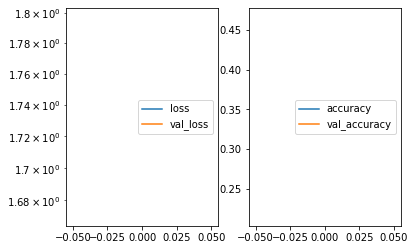

Predicted cell: Division Probability: [[0.9798701]]
True Cell type: Division
x [[0.3284727]]
True positional value x 0.34375
y [[0.54252875]]
True positional value y 0.65625
t [[0.9942992]]
True positional value t 1.0
h [[0.288422]]
True positional value h 0.140625
w [[0.22809109]]
True positional value w 0.203125


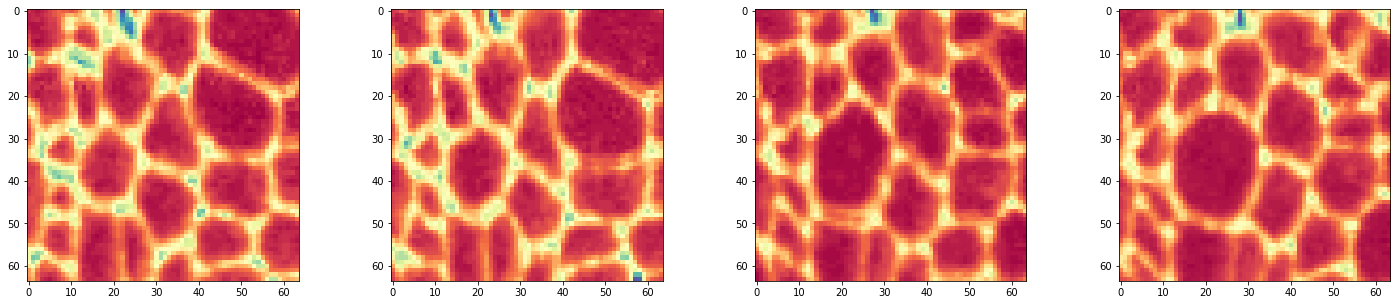

Epoch 2/250
27397/27397 [==============================] - 1343s 49ms/step - loss: 1.6494 - accuracy: 0.5591 - val_loss: 1.5734 - val_accuracy: 0.5700

Epoch 00002: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


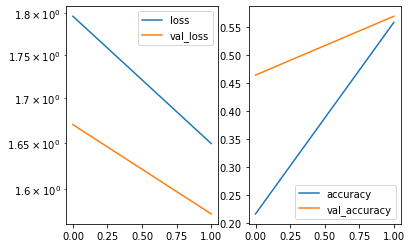

Predicted cell: Division Probability: [[0.99752706]]
True Cell type: Division
x [[0.6188049]]
True positional value x 0.65625
y [[0.6721412]]
True positional value y 0.65625
t [[0.99831426]]
True positional value t 1.0
h [[0.225175]]
True positional value h 0.234375
w [[0.2552761]]
True positional value w 0.21875


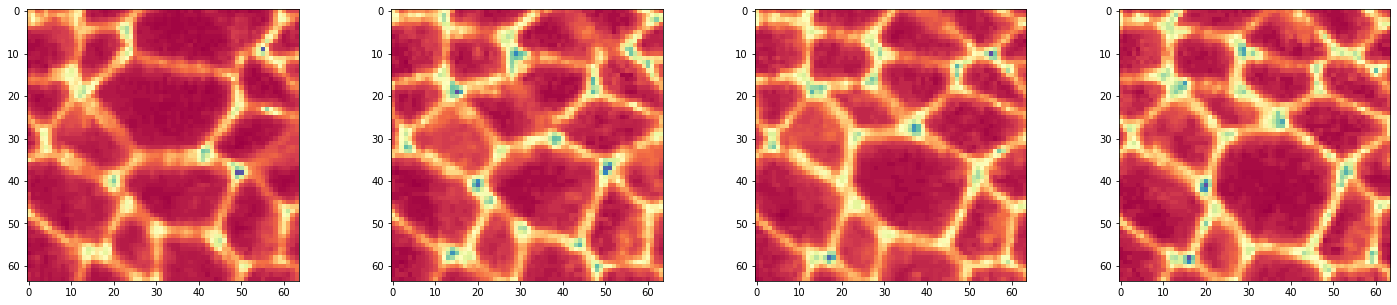

Epoch 3/250
27397/27397 [==============================] - 1345s 49ms/step - loss: 1.5755 - accuracy: 0.6907 - val_loss: 1.5321 - val_accuracy: 0.6325

Epoch 00003: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


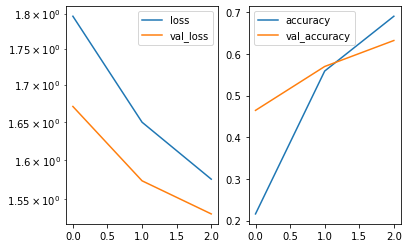

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.49882534]]
True positional value x 0.5
y [[0.45613965]]
True positional value y 0.34375
t [[0.9933333]]
True positional value t 1.0
h [[0.287715]]
True positional value h 0.265625
w [[0.3522143]]
True positional value w 0.296875


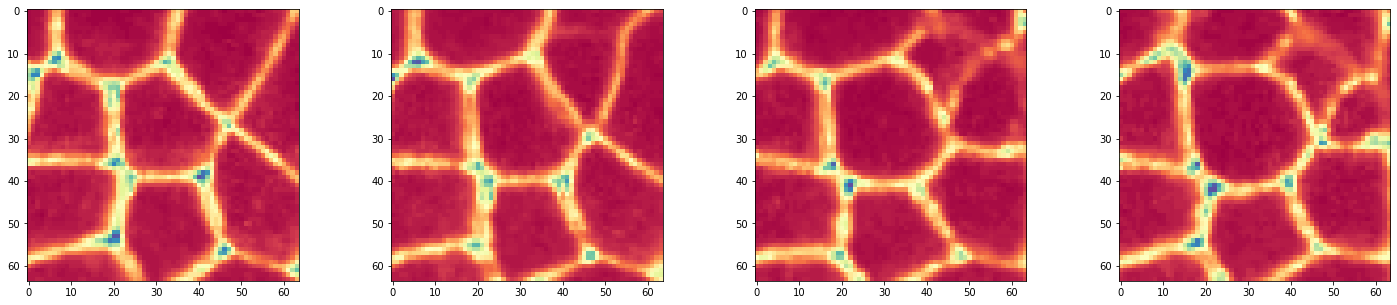

Epoch 4/250
27397/27397 [==============================] - 1347s 49ms/step - loss: 1.5261 - accuracy: 0.7620 - val_loss: 1.5040 - val_accuracy: 0.7594

Epoch 00004: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


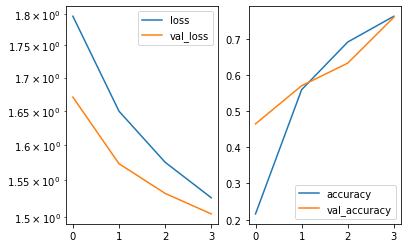

Predicted cell: Division Probability: [[0.975547]]
True Cell type: Division
x [[0.5155224]]
True positional value x 0.34375
y [[0.48670363]]
True positional value y 0.5
t [[0.9723858]]
True positional value t 1.0
h [[0.29531273]]
True positional value h 0.203125
w [[0.3495783]]
True positional value w 0.203125


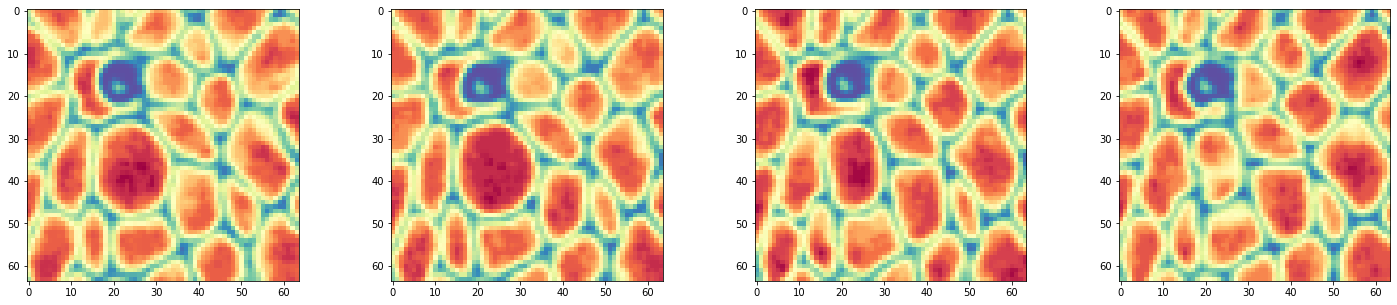

Epoch 5/250
27397/27397 [==============================] - 1345s 49ms/step - loss: 1.4870 - accuracy: 0.8498 - val_loss: 1.4807 - val_accuracy: 0.8870

Epoch 00005: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


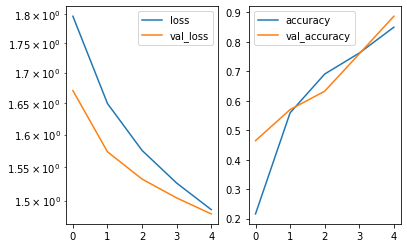

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.66185904]]
True positional value x 0.65625
y [[0.4652359]]
True positional value y 0.5
t [[0.99818784]]
True positional value t 1.0
h [[0.39190143]]
True positional value h 0.453125
w [[0.46166265]]
True positional value w 0.5


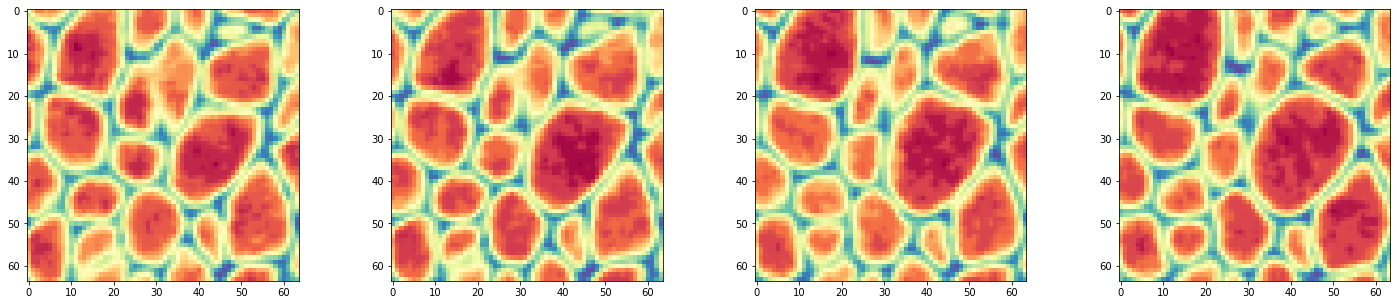

Epoch 6/250
27397/27397 [==============================] - 1344s 49ms/step - loss: 1.4657 - accuracy: 0.8741 - val_loss: 1.4555 - val_accuracy: 0.9043

Epoch 00006: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


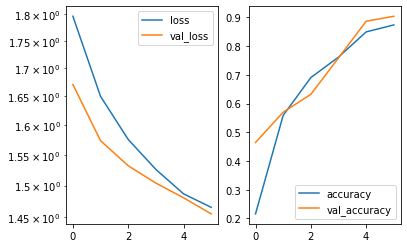

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.6386607]]
True positional value x 0.65625
y [[0.57813877]]
True positional value y 0.65625
t [[0.99535877]]
True positional value t 1.0
h [[0.27992266]]
True positional value h 0.265625
w [[0.34584963]]
True positional value w 0.234375


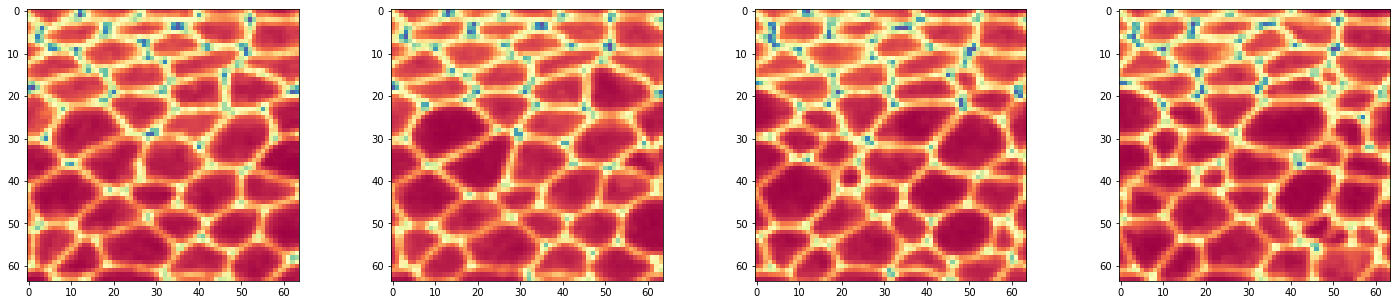

Epoch 7/250
27397/27397 [==============================] - 1343s 49ms/step - loss: 1.4357 - accuracy: 0.9142 - val_loss: 1.4212 - val_accuracy: 0.9445

Epoch 00007: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


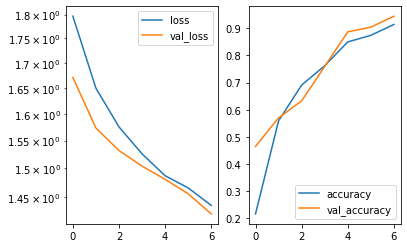

Predicted cell: Normal Probability: [[0.9999387]]
True Cell type: Normal
x [[0.5014612]]
True positional value x 0.5
y [[0.49103436]]
True positional value y 0.5
t [[0.9958189]]
True positional value t 1.0
h [[0.12526448]]
True positional value h 0.109375
w [[0.11977]]
True positional value w 0.078125


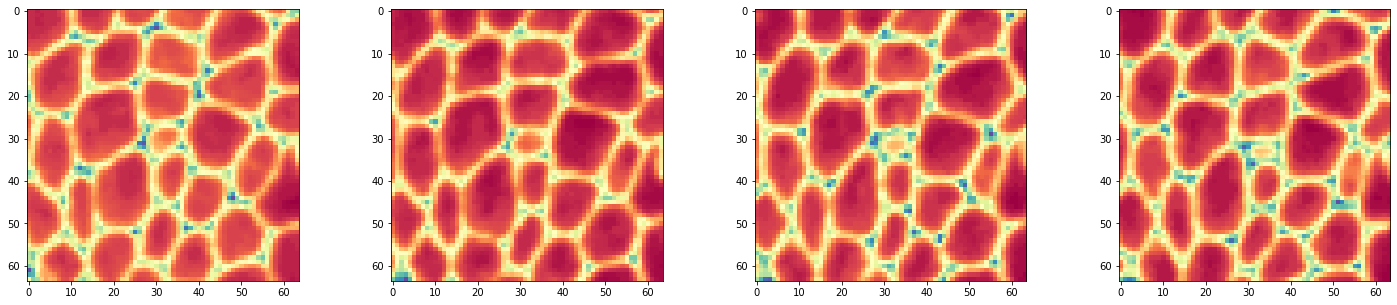

Epoch 8/250
27397/27397 [==============================] - 1341s 49ms/step - loss: 1.4151 - accuracy: 0.9156 - val_loss: 1.4252 - val_accuracy: 0.9043

Epoch 00008: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


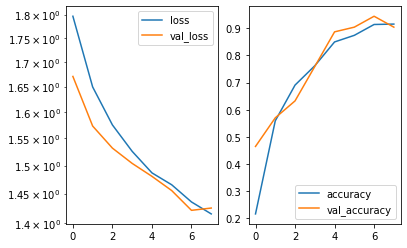

Predicted cell: Division Probability: [[0.9999486]]
True Cell type: Division
x [[0.44119865]]
True positional value x 0.5
y [[0.5845541]]
True positional value y 0.65625
t [[0.9983718]]
True positional value t 1.0
h [[0.17974469]]
True positional value h 0.15625
w [[0.1838118]]
True positional value w 0.25


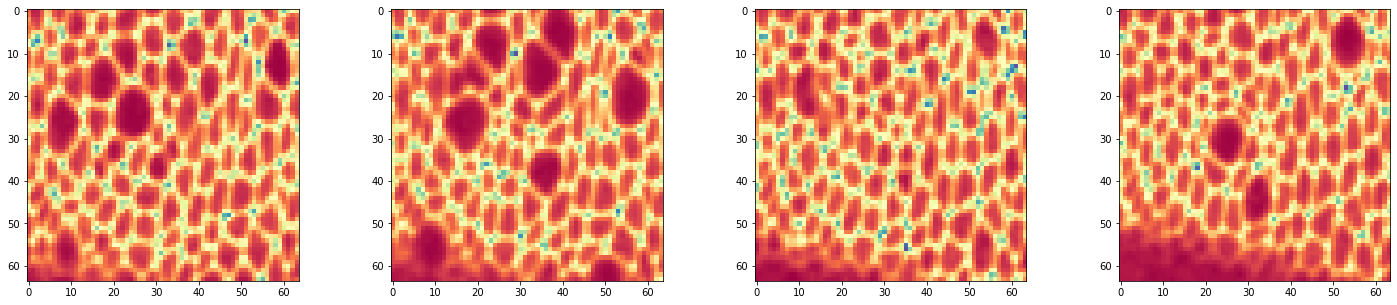

Epoch 9/250
27397/27397 [==============================] - 1343s 49ms/step - loss: 1.3935 - accuracy: 0.9332 - val_loss: 1.4028 - val_accuracy: 0.9057

Epoch 00009: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


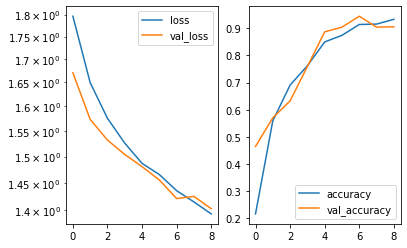

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.47277904]]
True positional value x 0.5
y [[0.6886811]]
True positional value y 0.65625
t [[0.999315]]
True positional value t 1.0
h [[0.45464432]]
True positional value h 0.453125
w [[0.52479607]]
True positional value w 0.5


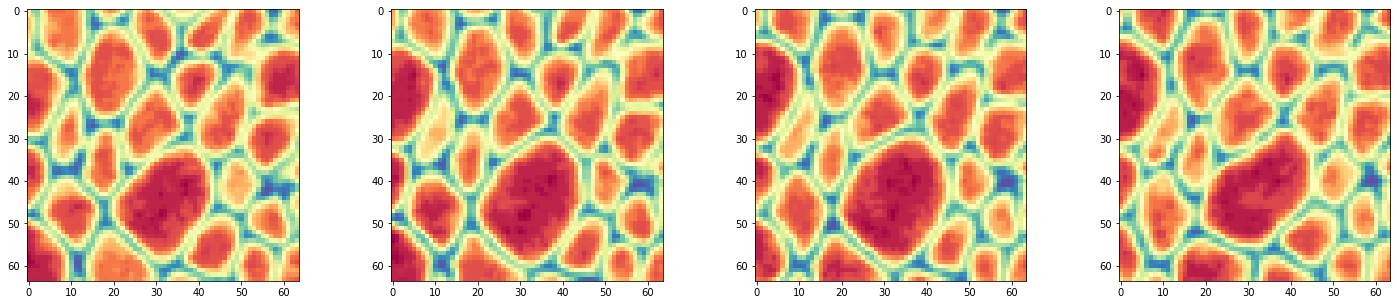

Epoch 10/250
27397/27397 [==============================] - 1342s 49ms/step - loss: 1.3744 - accuracy: 0.9479 - val_loss: 1.3691 - val_accuracy: 0.9660

Epoch 00010: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


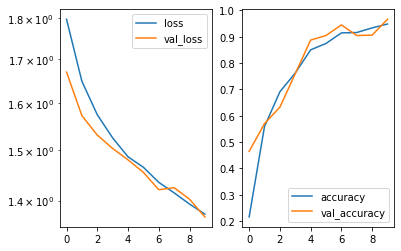

Predicted cell: Division Probability: [[0.9999999]]
True Cell type: Division
x [[0.52036285]]
True positional value x 0.65625
y [[0.51886624]]
True positional value y 0.65625
t [[0.9994319]]
True positional value t 1.0
h [[0.16451149]]
True positional value h 0.140625
w [[0.18673964]]
True positional value w 0.203125


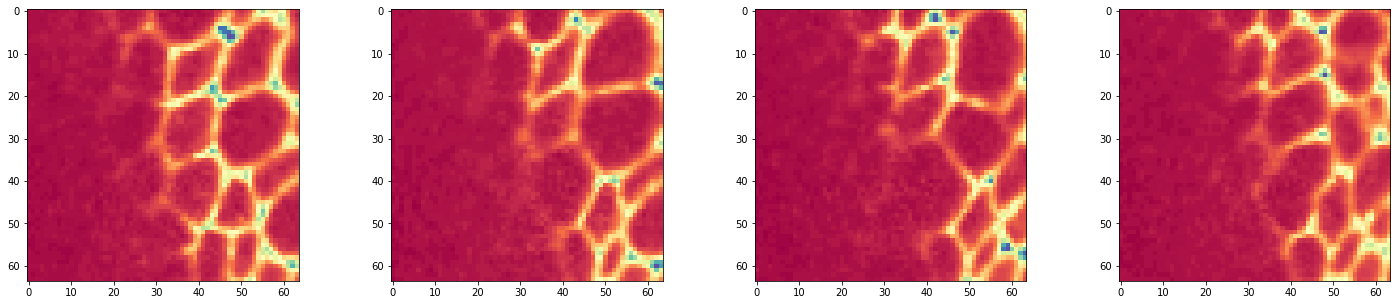

Epoch 11/250
27397/27397 [==============================] - 1343s 49ms/step - loss: 1.3531 - accuracy: 0.9550 - val_loss: 1.3635 - val_accuracy: 0.9584

Epoch 00011: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


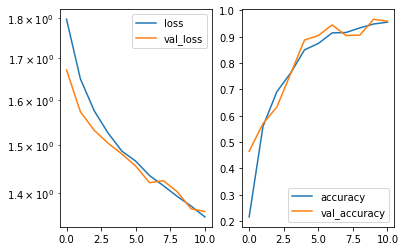

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.5698659]]
True positional value x 0.5
y [[0.63669]]
True positional value y 0.5
t [[0.9986998]]
True positional value t 1.0
h [[0.35304937]]
True positional value h 0.359375
w [[0.3383596]]
True positional value w 0.421875


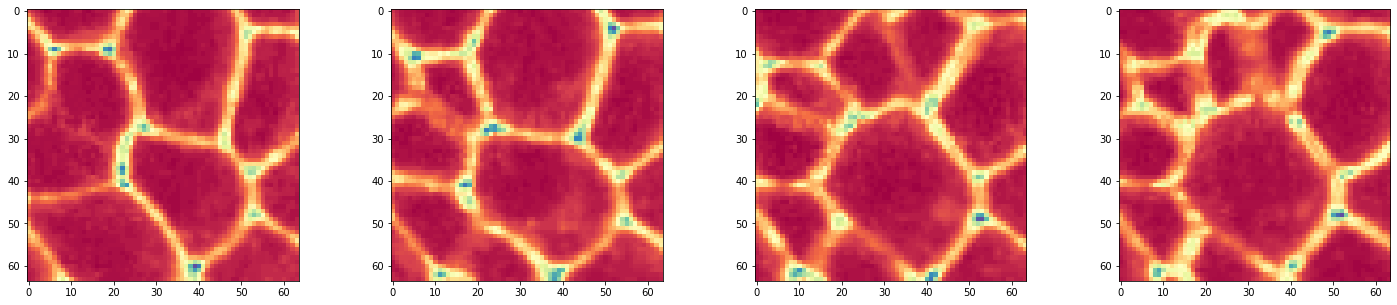

Epoch 12/250
27397/27397 [==============================] - 1343s 49ms/step - loss: 1.3314 - accuracy: 0.9719 - val_loss: 1.3422 - val_accuracy: 0.9501

Epoch 00012: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


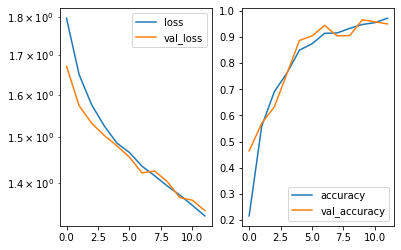

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.4827692]]
True positional value x 0.5
y [[0.43738696]]
True positional value y 0.34375
t [[0.9988175]]
True positional value t 1.0
h [[0.19110616]]
True positional value h 0.109375
w [[0.18678212]]
True positional value w 0.234375


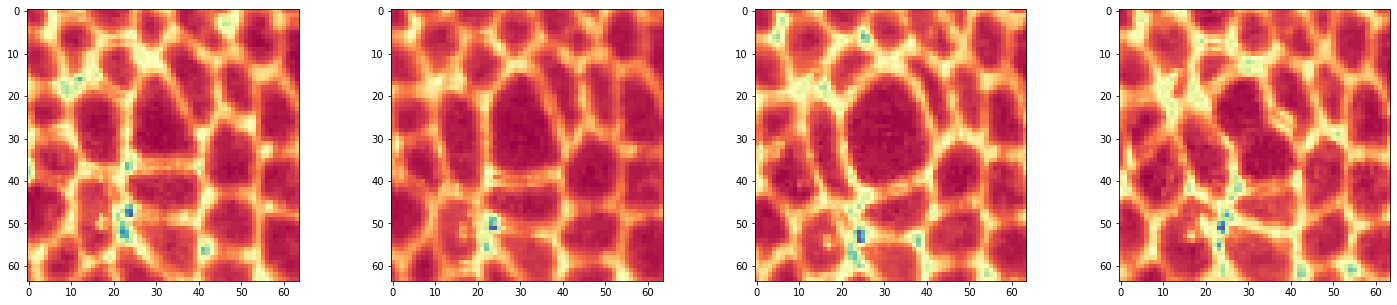

Epoch 13/250
27397/27397 [==============================] - 1343s 49ms/step - loss: 1.3140 - accuracy: 0.9738 - val_loss: 1.3212 - val_accuracy: 0.9632

Epoch 00013: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


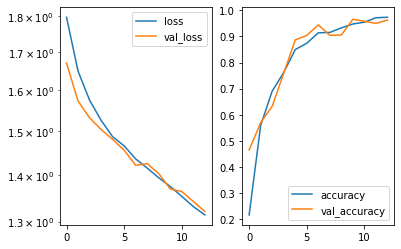

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.32062554]]
True positional value x 0.34375
y [[0.6416999]]
True positional value y 0.65625
t [[0.99900216]]
True positional value t 1.0
h [[0.11697232]]
True positional value h 0.15625
w [[0.14482273]]
True positional value w 0.15625


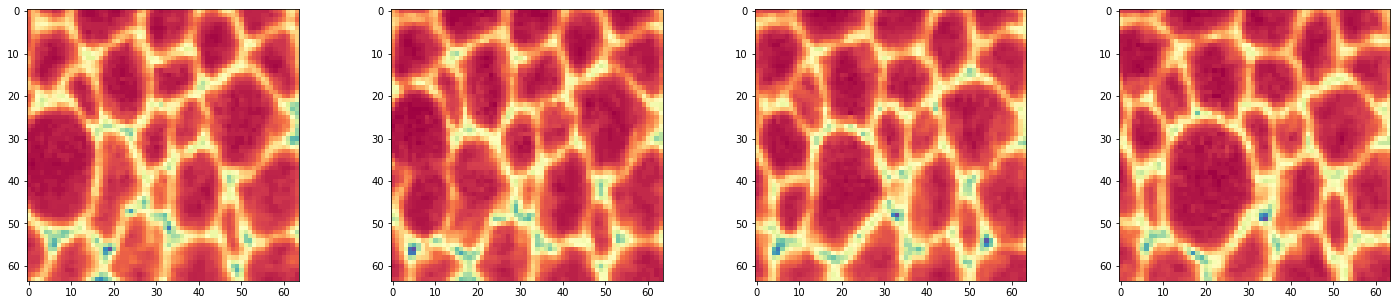

Epoch 14/250
27397/27397 [==============================] - 1344s 49ms/step - loss: 1.2970 - accuracy: 0.9694 - val_loss: 1.3168 - val_accuracy: 0.9778

Epoch 00014: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


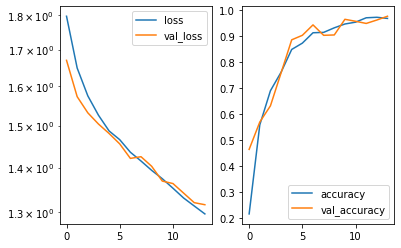

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.37208563]]
True positional value x 0.34375
y [[0.34497052]]
True positional value y 0.34375
t [[0.99715567]]
True positional value t 1.0
h [[0.25262907]]
True positional value h 0.28125
w [[0.19044037]]
True positional value w 0.203125


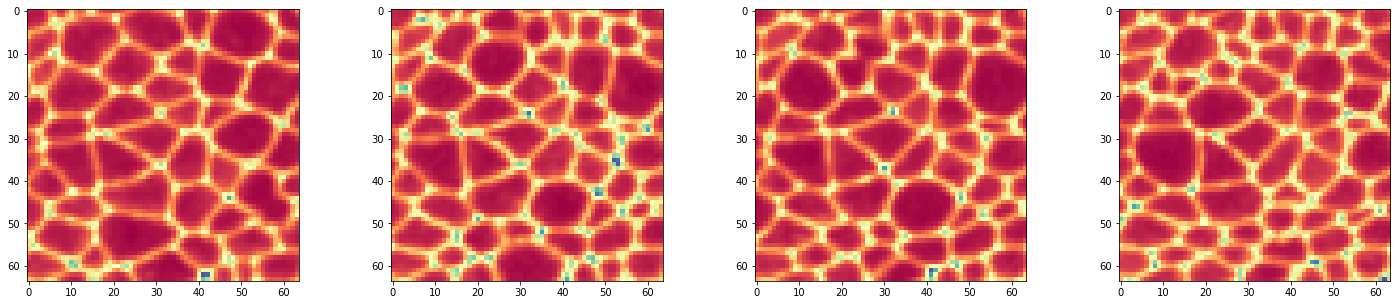

Epoch 15/250
27397/27397 [==============================] - 1361s 50ms/step - loss: 1.2815 - accuracy: 0.9722 - val_loss: 1.2881 - val_accuracy: 0.9730

Epoch 00015: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


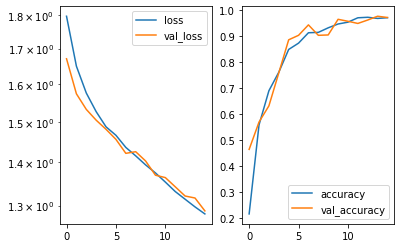

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.43873408]]
True positional value x 0.34375
y [[0.32810488]]
True positional value y 0.34375
t [[0.99878603]]
True positional value t 1.0
h [[0.23023954]]
True positional value h 0.171875
w [[0.3045655]]
True positional value w 0.234375


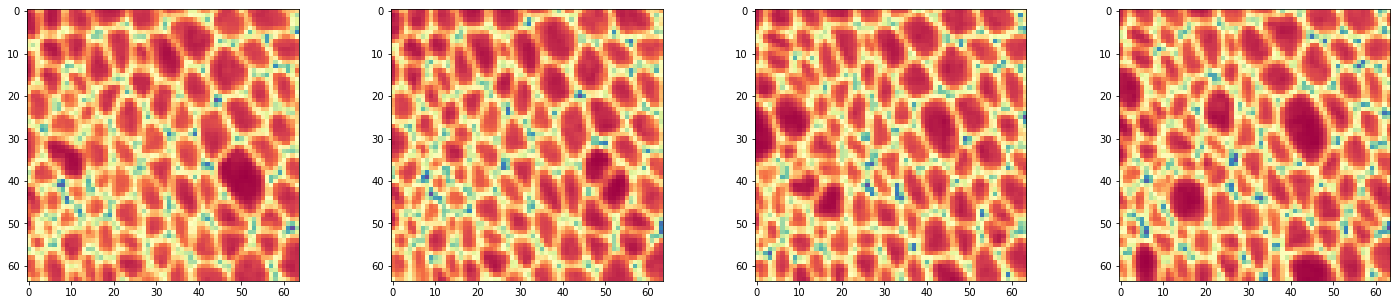

Epoch 16/250
27397/27397 [==============================] - 1361s 50ms/step - loss: 1.2664 - accuracy: 0.9670 - val_loss: 1.2732 - val_accuracy: 0.9293

Epoch 00016: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


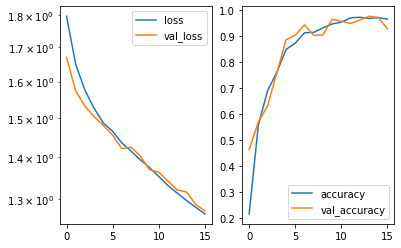

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.341776]]
True positional value x 0.34375
y [[0.49082237]]
True positional value y 0.5
t [[0.99721164]]
True positional value t 1.0
h [[0.36495546]]
True positional value h 0.421875
w [[0.38543057]]
True positional value w 0.515625


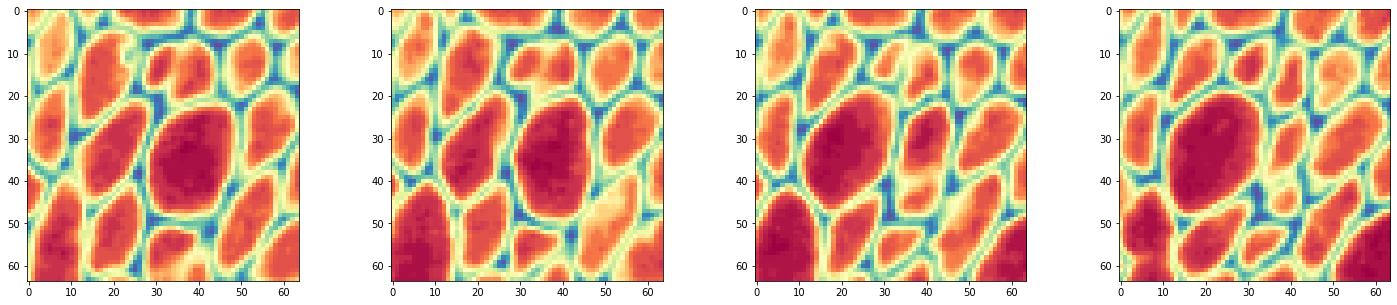

Epoch 17/250
27397/27397 [==============================] - 1336s 49ms/step - loss: 1.2468 - accuracy: 0.9776 - val_loss: 1.2503 - val_accuracy: 0.9563

Epoch 00017: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


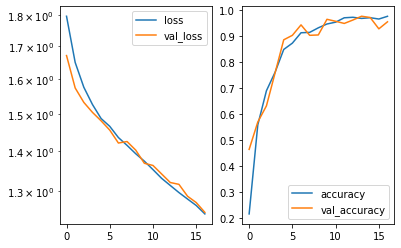

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.24496056]]
True positional value x 0.34375
y [[0.48230487]]
True positional value y 0.65625
t [[0.999647]]
True positional value t 1.0
h [[0.18264215]]
True positional value h 0.15625
w [[0.22643605]]
True positional value w 0.203125


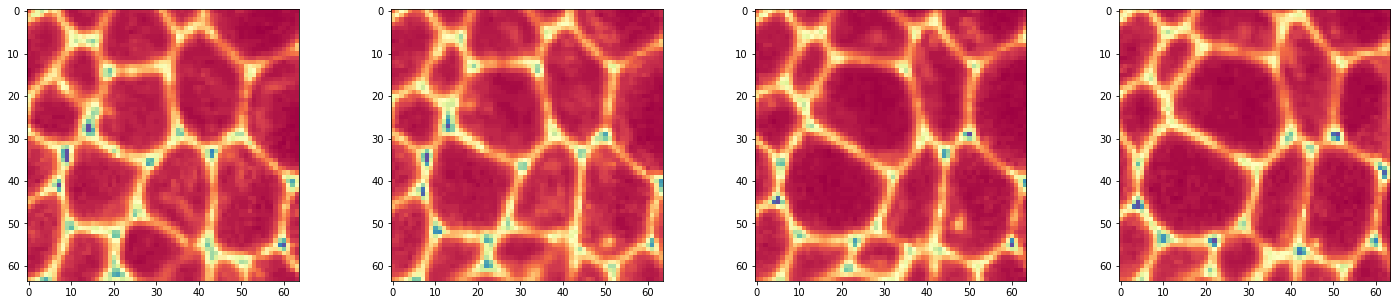

Epoch 18/250
27397/27397 [==============================] - 1348s 49ms/step - loss: 1.2300 - accuracy: 0.9865 - val_loss: 1.2516 - val_accuracy: 0.9820

Epoch 00018: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


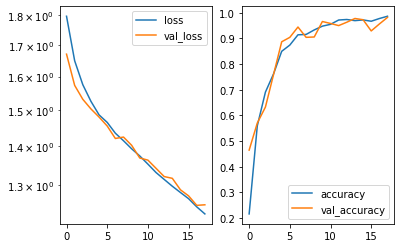

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.4698621]]
True positional value x 0.34375
y [[0.35600668]]
True positional value y 0.5
t [[0.9996933]]
True positional value t 1.0
h [[0.15035059]]
True positional value h 0.140625
w [[0.17531496]]
True positional value w 0.1875


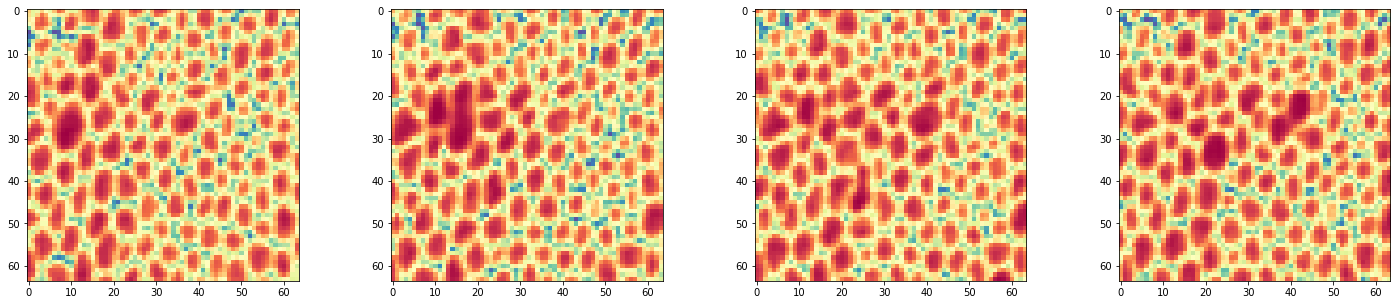

Epoch 19/250
27397/27397 [==============================] - 1340s 49ms/step - loss: 1.2176 - accuracy: 0.9777 - val_loss: 1.2254 - val_accuracy: 0.9674

Epoch 00019: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


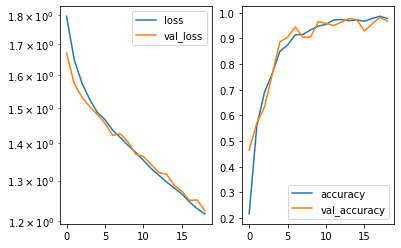

Predicted cell: Normal Probability: [[0.99994266]]
True Cell type: Normal
x [[0.5284228]]
True positional value x 0.5
y [[0.5015489]]
True positional value y 0.5
t [[0.9961662]]
True positional value t 1.0
h [[0.15395936]]
True positional value h 0.078125
w [[0.16418035]]
True positional value w 0.140625


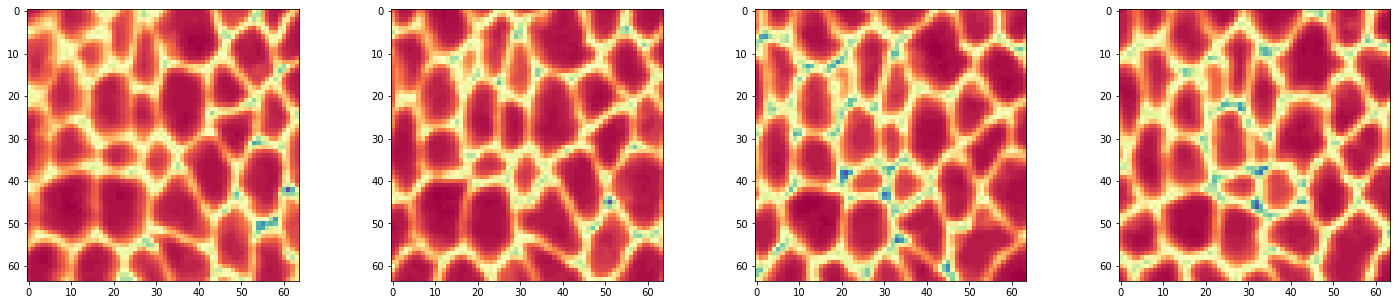

Epoch 20/250
27397/27397 [==============================] - 1339s 49ms/step - loss: 1.2009 - accuracy: 0.9743 - val_loss: 1.2245 - val_accuracy: 0.9300

Epoch 00020: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


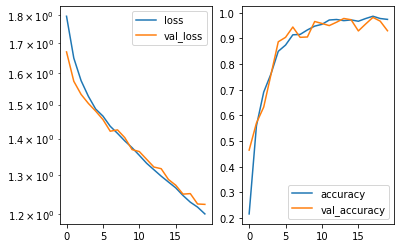

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.4229292]]
True positional value x 0.5
y [[0.43425176]]
True positional value y 0.34375
t [[0.99853754]]
True positional value t 1.0
h [[0.31315708]]
True positional value h 0.265625
w [[0.22176291]]
True positional value w 0.25


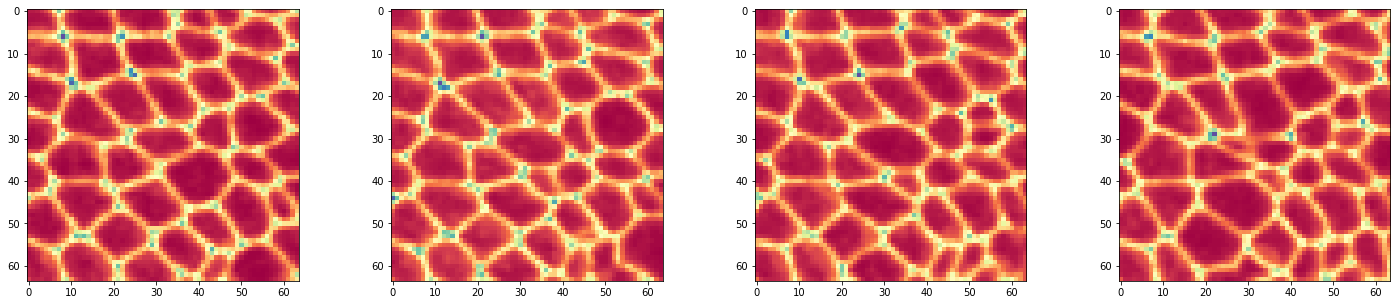

Epoch 21/250
27397/27397 [==============================] - 1340s 49ms/step - loss: 1.1860 - accuracy: 0.9718 - val_loss: 1.1915 - val_accuracy: 0.9792

Epoch 00021: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


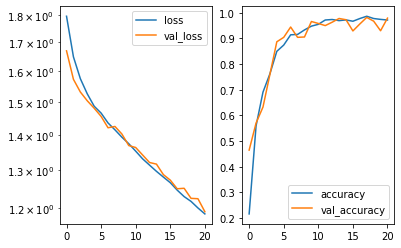

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.4931281]]
True positional value x 0.5
y [[0.31612453]]
True positional value y 0.34375
t [[0.9942901]]
True positional value t 1.0
h [[0.40526775]]
True positional value h 0.4375
w [[0.3921621]]
True positional value w 0.421875


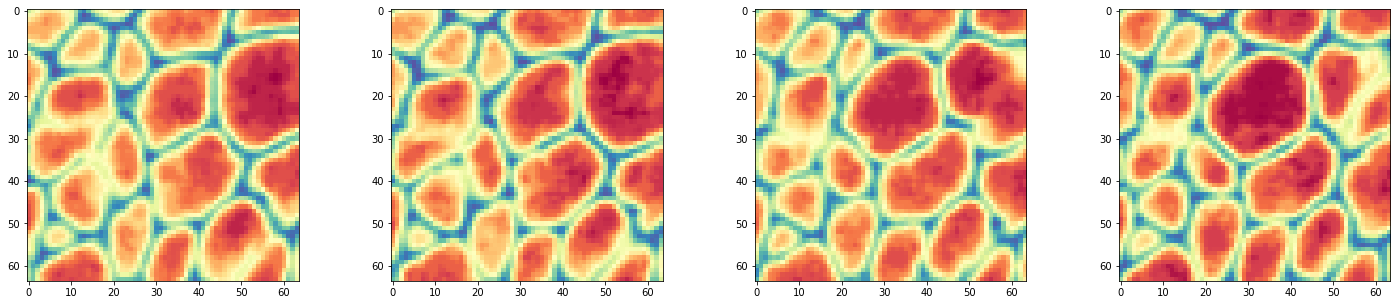

Epoch 22/250
27397/27397 [==============================] - 1346s 49ms/step - loss: 1.1666 - accuracy: 0.9911 - val_loss: 1.1785 - val_accuracy: 0.9834

Epoch 00022: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


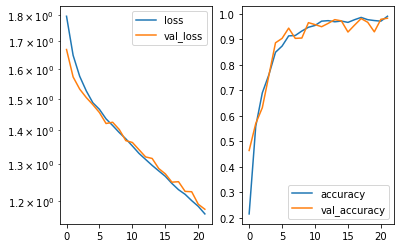

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.62393445]]
True positional value x 0.65625
y [[0.37942612]]
True positional value y 0.34375
t [[0.99765414]]
True positional value t 1.0
h [[0.23759669]]
True positional value h 0.265625
w [[0.25637788]]
True positional value w 0.25


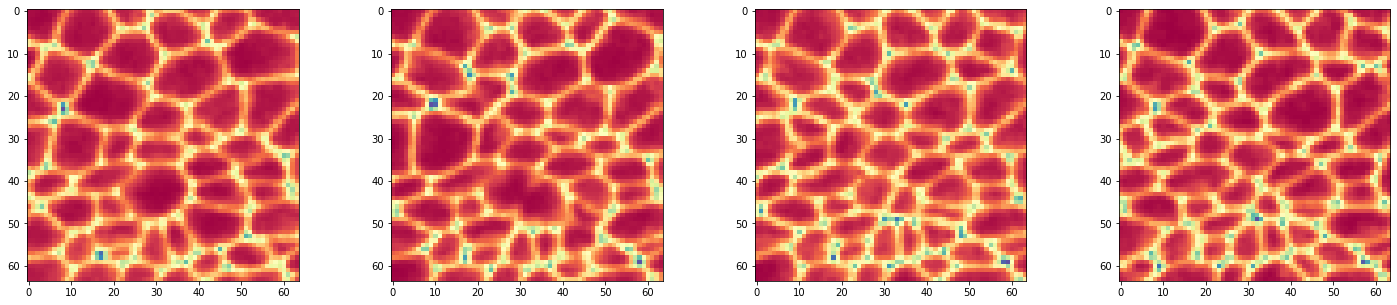

Epoch 23/250
27397/27397 [==============================] - 1333s 49ms/step - loss: 1.1507 - accuracy: 0.9945 - val_loss: 1.1645 - val_accuracy: 0.9840

Epoch 00023: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


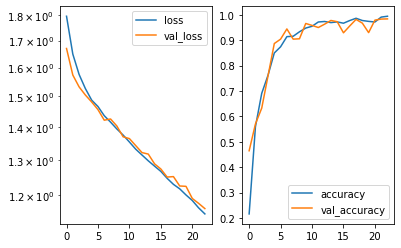

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
x [[0.488397]]
True positional value x 0.5
y [[0.48489872]]
True positional value y 0.5
t [[0.9953383]]
True positional value t 1.0
h [[0.24198395]]
True positional value h 0.296875
w [[0.1902354]]
True positional value w 0.234375


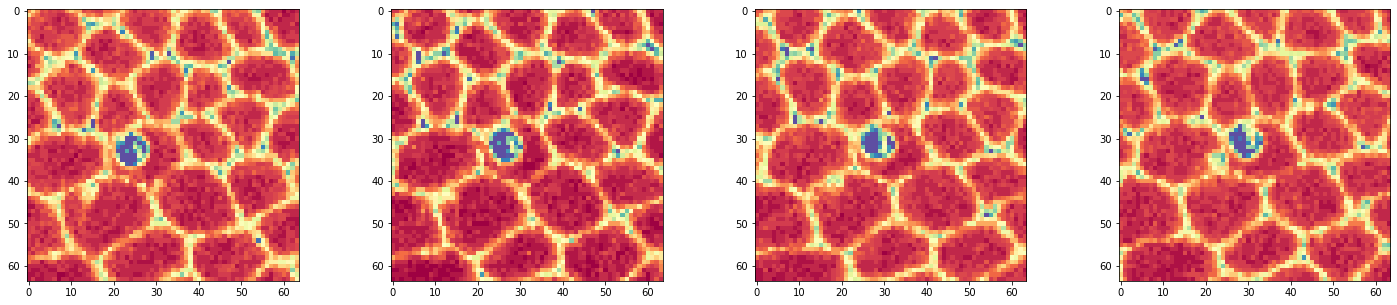

Epoch 24/250
27397/27397 [==============================] - 1328s 48ms/step - loss: 1.1371 - accuracy: 0.9899 - val_loss: 1.1482 - val_accuracy: 0.9840

Epoch 00024: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


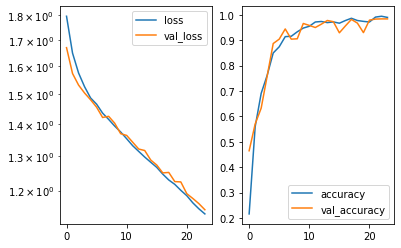

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.65682536]]
True positional value x 0.65625
y [[0.6596999]]
True positional value y 0.65625
t [[0.99634933]]
True positional value t 1.0
h [[0.3539753]]
True positional value h 0.390625
w [[0.47881255]]
True positional value w 0.5


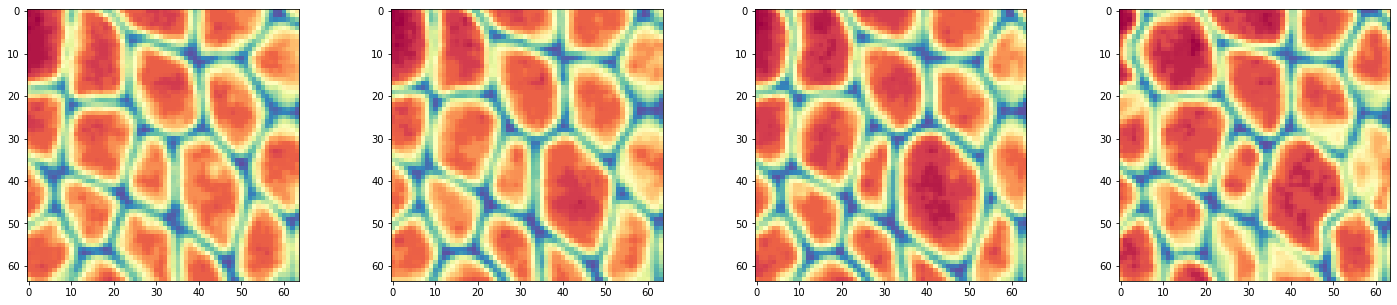

Epoch 25/250
27397/27397 [==============================] - 1326s 48ms/step - loss: 1.1220 - accuracy: 0.9915 - val_loss: 1.1399 - val_accuracy: 0.9771

Epoch 00025: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


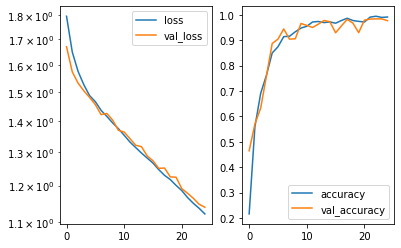

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.65508485]]
True positional value x 0.65625
y [[0.6532849]]
True positional value y 0.65625
t [[0.9931284]]
True positional value t 1.0
h [[0.39123023]]
True positional value h 0.46875
w [[0.44338948]]
True positional value w 0.4375


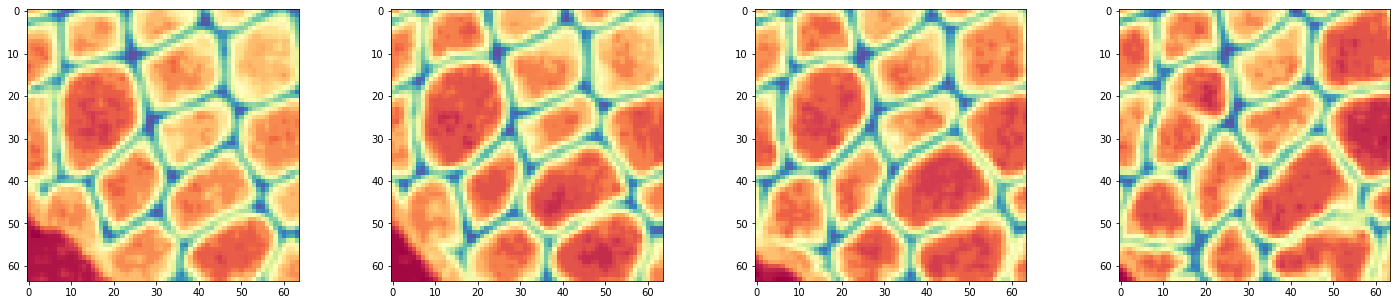

Epoch 26/250
12032/27397 [============>.................] - ETA: 12:34 - loss: 1.1152 - accuracy: 0.9803

In [ ]:
Train = NEATDynamic(config, model_dir, model_name)

Train.loadData()

Train.TrainModel()
